In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# Преобразование Бокса-Кокса

Если случайная величина имеет логнормальное распределение, то ее логарифм имеет нормальное распределение.

In [2]:
data_log = pd.Series(np.random.lognormal(0, 1, 1000))

<AxesSubplot:>

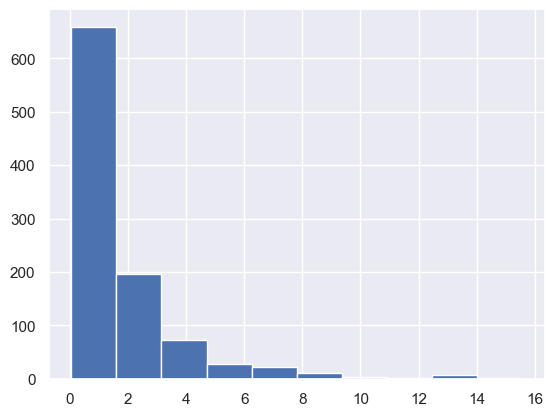

In [3]:
data_log.hist()

<AxesSubplot:>

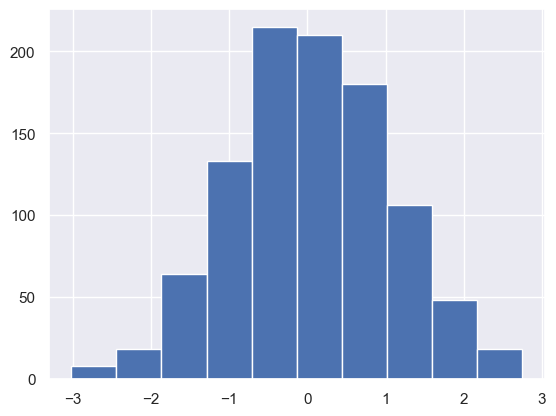

In [4]:
np.log(data_log).hist()

Почему это работает?

/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51194/4063628510.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


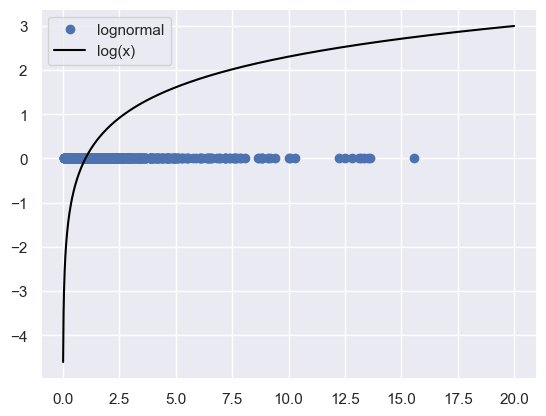

In [5]:
log_x = np.arange(0.01, 20, 0.01)
log_y = np.log(log_x)

x_points = data_log
y_points = np.zeros(1000)

fig = plt.figure()
plt.plot(x_points, y_points, 'o', label="lognormal")
plt.plot(log_x, log_y, 'black', label='log(x)')

plt.legend()

fig.show()

Если экспоненциальное распределение?

In [6]:
data_exp = pd.Series(np.random.exponential(size=1000))

<AxesSubplot:>

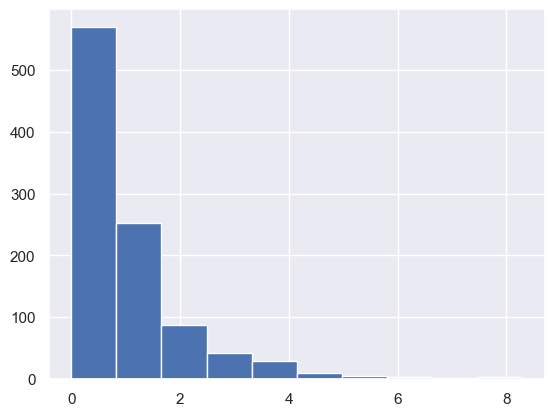

In [7]:
data_exp.hist()

<AxesSubplot:>

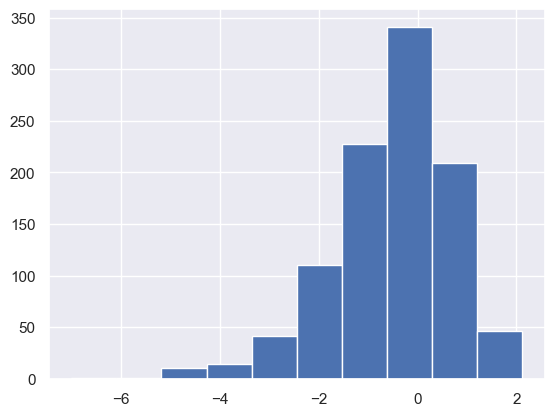

In [8]:
np.log(data_exp).hist()

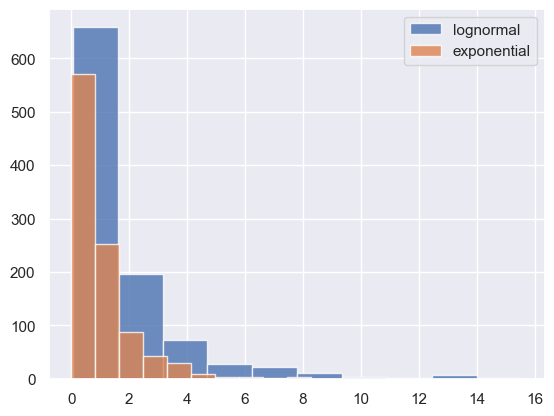

In [9]:
plt.hist(data_log, label='lognormal', alpha=.8)
plt.hist(data_exp, label='exponential', alpha=.8)
plt.legend()

plt.show()

Найдем такое преобразование.

$$\int\frac{1}{x^{1-\lambda}}=\frac{x^\lambda-1}{\lambda}+C,$$
где $\lambda$ - искомый параметр.

$$x^*_i=\begin{cases}
\ln(x), & \lambda=0 \\
\frac{x^\lambda-1}{\lambda}, & \text{в обратном случае.}
\end{cases}$$

In [10]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data_exp)

<AxesSubplot:>

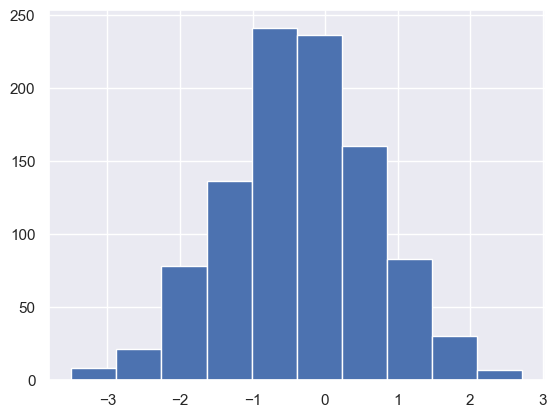

In [11]:
pd.Series(transformed_data).hist()

In [12]:
best_lambda

0.22783559400198777

# Отбор признаков

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

## Корреляционный анализ

In [ ]:
train_X.columns

In [ ]:
ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

In [ ]:
sns.histplot(data=train_X, x='engine-type')

In [ ]:
sns.pairplot(train_X[numerical]);

In [ ]:
train = train_X
train['target'] = train_y
sns.heatmap(train[numerical + ['target']].corr(method='spearman'));

In [ ]:
from scipy.stats import pearsonr, spearmanr

r = pearsonr(train['configurations_auto-premiere'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

In [ ]:
r = pearsonr(train['battery-capacity'], train['target'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

## F-test

In [22]:
from sklearn.feature_selection import f_regression, SelectKBest

In [23]:
f_statistic, p_values = f_regression(train_X, train_y)

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
p_values

array([4.14261514e-178, 5.61054736e-005, 2.22583374e-084, 4.29215233e-006,
       5.19880608e-097, 0.00000000e+000, 0.00000000e+000, 3.00761649e-002,
       1.23407205e-153, 1.91780781e-122, 1.08128701e-102, 5.89170255e-038,
       1.18423856e-051, 6.73034264e-090, 6.04804785e-008, 3.29025321e-015,
       3.33873440e-033, 1.45689423e-002, 0.00000000e+000, 9.72564683e-079,
       6.46321123e-022, 5.15233301e-231, 8.63015515e-002, 0.00000000e+000,
       0.00000000e+000, 1.90641086e-122, 7.01981268e-140, 5.09638729e-005,
       4.56879391e-064, 3.51507643e-001, 1.00000000e+000])

In [25]:
sekector = SelectKBest(f_regression, k=20)
sekector.fit_transform(train_X, train_y)

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 3.0000e+00,  1.1636e+04, -1.0000e+00, ...,  2.0000e+03,
         1.6000e+01,  0.0000e+00],
       [ 8.0000e+00,  3.1764e+04, -1.0000e+00, ...,  1.9960e+03,
         2.3000e+01,  0.0000e+00],
       [ 8.0000e+00,  2.7730e+03,  6.8000e+00, ...,  2.0120e+03,
         1.0000e+01,  0.0000e+00],
       ...,
       [ 3.0000e+00,  4.8819e+04,  7.6000e+00, ..., -1.0000e+00,
         2.6000e+01,  0.0000e+00],
       [ 1.0000e+01,  9.3460e+03, -1.0000e+00, ...,  1.9950e+03,
         1.6000e+01,  0.0000e+00],
       [ 3.0000e+00,  4.3309e+04, -1.0000e+00, ...,  2.0070e+03,
         3.5000e+01,  0.0000e+00]])

In [26]:
sekector.get_feature_names_out()

array(['back-suspension', 'charge-time', 'consumption-mixed',
       'cylinders-order', 'cylinders-value', 'engine-start',
       'engine-stop', 'engine-type', 'gear-type', 'luxury', 'max-speed',
       'valves', 'weight', 'configurations_auto-premiere',
       'configurations_front-brake', 'configurations_seats',
       'configurations_tank-volume', 'supergen_year-stop',
       'models_country-from', 'models_light-and-commercial'], dtype=object)

## Значения Шепли

In [ ]:
pip install shap

In [5]:
import shap

In [6]:
reg = LinearRegression().fit(train_X, train_y)

In [7]:
explainer = shap.Explainer(reg, train_X)
shap_values = explainer(test_X)

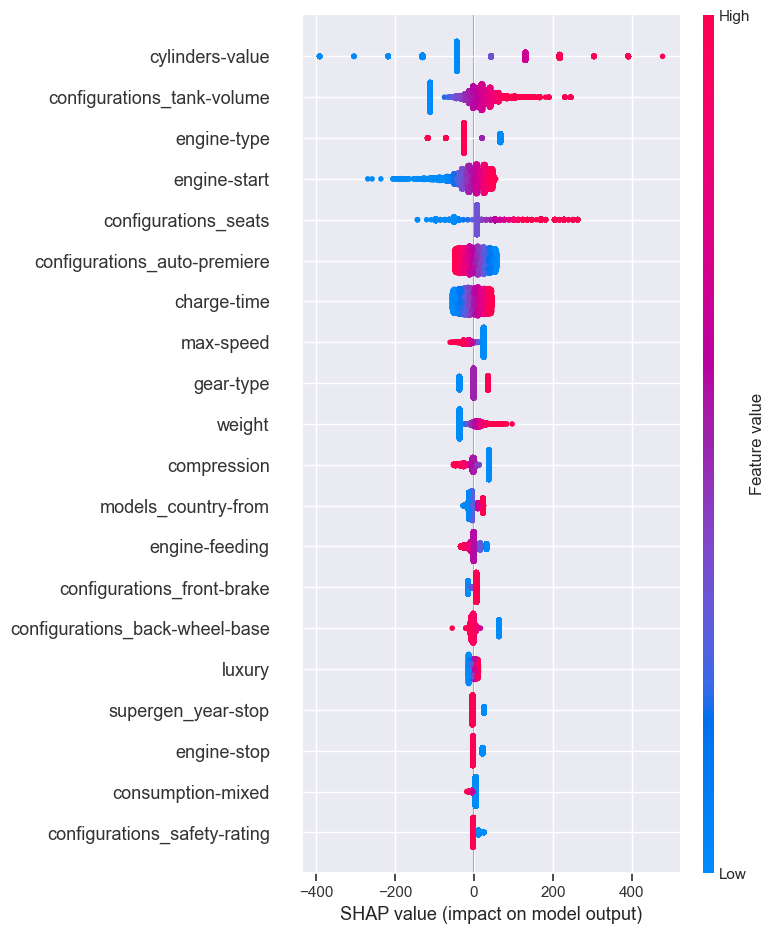

In [8]:
shap.summary_plot(shap_values, test_X)

Для признака cylinders-value наблюдается положительная статистическая зависимость от целевой переменной. Сравните Ваш результат с результатом работы библиотеки shap.

In [5]:
cut_X = X[train_X.columns[:5]]
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]
cut_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed
0,9,-1.0,36457,9.0,4.3
1,3,-1.0,44872,8.0,-1.0
2,3,-1.0,55927,16.0,4.2
3,0,-1.0,41405,10.3,-1.0
4,8,-1.0,22523,19.0,-1.0
...,...,...,...,...,...
43240,9,-1.0,34558,11.2,6.6
43241,3,-1.0,38268,9.6,5.8
43242,3,-1.0,8958,10.0,9.3
43243,3,-1.0,20293,8.5,-1.0


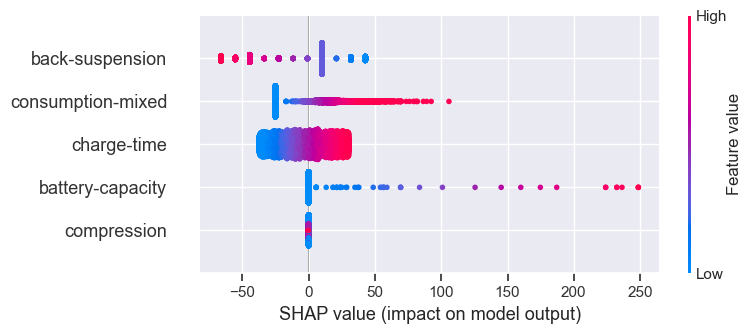

In [10]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

### Задание

Для сокращенных данных (train_cut_X и test_cut_X) реализовать метод отбора важности признаков по Шепли.

In [29]:
from itertools import chain, combinations
from math import factorial as f

def powerset(iterable, i):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    s.remove(i)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
list(powerset(train_cut_X, 'back-suspension'))

[(),
 ('battery-capacity',),
 ('charge-time',),
 ('compression',),
 ('consumption-mixed',),
 ('battery-capacity', 'charge-time'),
 ('battery-capacity', 'compression'),
 ('battery-capacity', 'consumption-mixed'),
 ('charge-time', 'compression'),
 ('charge-time', 'consumption-mixed'),
 ('compression', 'consumption-mixed'),
 ('battery-capacity', 'charge-time', 'compression'),
 ('battery-capacity', 'charge-time', 'consumption-mixed'),
 ('battery-capacity', 'compression', 'consumption-mixed'),
 ('charge-time', 'compression', 'consumption-mixed'),
 ('battery-capacity', 'charge-time', 'compression', 'consumption-mixed')]

In [31]:
train_cut_X.columns

Index(['back-suspension', 'battery-capacity', 'charge-time', 'compression',
       'consumption-mixed'],
      dtype='object')

In [33]:
shap = {}
for i in train_cut_X.columns:
    S = list(powerset(train_cut_X, i))
    shap_sum = 0
    for s in S:
        n = (f(len(s)) * f(len(train_cut_X.columns) +  len(s))) / f(len(train_cut_X.columns))
        fi = LinearRegression().fit(train_cut_X, train_y)
        f_i = LinearRegression().fit(train_cut_X.drop(i, axis=1), train_y)
        shap_sum += n*(fi.score(test_cut_X, test_y) - f_i.score(test_cut_X.drop(i, axis=1), test_y))
    shap[i] = shap_sum
shap
    
    


{'back-suspension': 1110.7369931479698,
 'battery-capacity': 108.83612156291747,
 'charge-time': 459.9163674926558,
 'compression': 0.38866645405170086,
 'consumption-mixed': 677.7873114295717}

In [45]:
sorted(shap.items(), key=lambda item: item[1], reverse=True)

[('back-suspension', 1110.7369931479698),
 ('consumption-mixed', 677.7873114295717),
 ('charge-time', 459.9163674926558),
 ('battery-capacity', 108.83612156291747),
 ('compression', 0.38866645405170086)]

## Пермутационная важность

In [47]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 840.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 2.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.7 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107728 sha256=4af00e12aaeef246d1fbd89275000c6357bd8bb18608ae6255bd9690565a69d4
  Stored in directory: /Users/aleksejrodin/Library/Caches/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed

In [48]:
import eli5
from eli5.sklearn import PermutationImportance

In [106]:
reg = LinearRegression().fit(train_cut_X, train_y)

In [107]:
perm = PermutationImportance(reg, random_state=42).fit(test_cut_X, test_y)

In [108]:
eli5.show_weights(perm, feature_names=list(test_cut_X.columns))

Weight,Feature
0.0310 ± 0.0033,back-suspension
0.0187 ± 0.0022,consumption-mixed
0.0118 ± 0.0021,charge-time
0.0026 ± 0.0001,battery-capacity
0.0000 ± 0.0000,compression


### Задание

Самостоятельно реализовать алгоритм отбора признаков на основе пермутационной важности. Построить гистограмму полученных значений.

In [5]:
import random as r

In [6]:
def shuffle(df, col):
    df_s = df.copy()
    X = np.array(df_s[col])
    r.shuffle(X)
    df_s[col] = X.tolist()
    return df_s
    

In [103]:
train_cut_X

,back-suspension,battery-capacity,charge-time,compression,consumption-mixed
22607,3,-1.0,11636,9.5,-1.0
36531,8,-1.0,31764,9.0,-1.0
24048,8,-1.0,2773,8.8,6.8
34819,3,-1.0,52039,14.0,5.3
1328,3,-1.0,20689,18.0,7.5
...,...,...,...,...,...
6265,6,-1.0,42729,16.5,4.7
11284,0,-1.0,46093,8.1,-1.0
38158,3,-1.0,48819,10.0,7.6
860,10,-1.0,9346,22.4,-1.0


In [7]:
pi = {}
fi = LinearRegression().fit(train_X, train_y)
for i in train_X.columns:
    pi[i] = fi.score(test_X, test_y) - fi.score(shuffle(test_X, i), test_y)
print(sorted(pi.items(), key=lambda item: item[1], reverse=True))
print(fi.score(test_X, test_y))
    
    
    
    

[('cylinders-value', 0.37294144882077707), ('configurations_tank-volume', 0.10216147051328284), ('configurations_seats', 0.09831116077120827), ('engine-type', 0.048790634916002995), ('engine-start', 0.04657617743818476), ('configurations_auto-premiere', 0.028878260189894034), ('charge-time', 0.02619615818326626), ('gear-type', 0.02125329166201373), ('compression', 0.02124915176305875), ('weight', 0.01603616323756596), ('max-speed', 0.012464210183138813), ('configurations_back-wheel-base', 0.01105225838202939), ('battery-capacity', 0.010123710456683699), ('engine-feeding', 0.007580922002249912), ('models_country-from', 0.006068699459432225), ('models_light-and-commercial', 0.004174616698034317), ('configurations_front-brake', 0.0037812650207410536), ('supergen_year-stop', 0.0029896848275318133), ('valves', 0.0026171037093727367), ('luxury', 0.00207053491819964), ('engine-stop', 0.001641632955935668), ('power-electro-kw', 0.0010325854021908665), ('configurations_safety-rating', 0.0007907

<AxesSubplot:xlabel='0'>

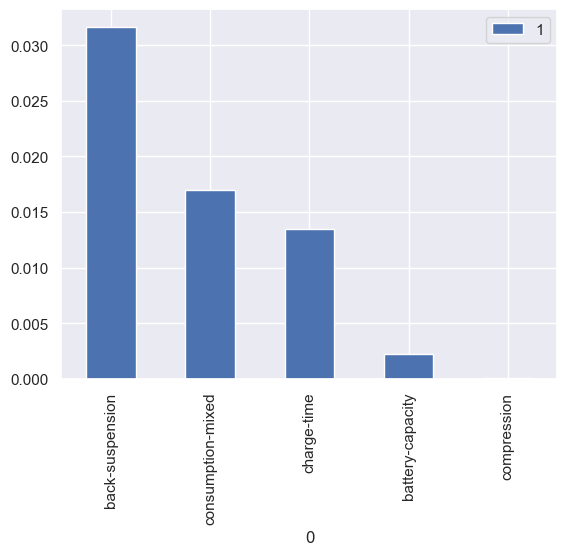

In [127]:
pi = {i[0]: i[1] for i in sorted(pi.items(), key=lambda item: item[1], reverse=True)}
df_pi = pd.DataFrame(pi.items())
df_pi
df_pi.plot(x = 0, y = 1, kind = 'bar')

# Домашнее задание

Сгенерировать полиномиальные признаки для рассматриваегомого сегодня набора данных. Попробовать отобрать признаки различными методами (можно теми, что не рассматривали). Получить максимальное качество на тестовых данных. Проинтерпретировать результаты.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
#X = df[['back-suspension', 'consumption-mixed', 'charge-time']]
X_poly = poly.fit_transform(cut_X)

train_X, test_X, train_y, test_y = train_test_split(X_poly, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(train_X, train_y)

reg.score(test_X, test_y)

0.15466129577679089

In [4]:
def replace_na(df_train, df_test, col):
    med = train_X[train_X[col] != 1][col].median()
    df_train[col] = df_train[col].replace(-1, med)
    df_test[col] = df_test[col].replace(-1, med)
    return df_train, df_test

for col in test_X.columns:
    train_X, test_X = replace_na(train_X, test_X, col)

In [5]:
#со всеми факторами
from sklearn.preprocessing import OneHotEncoder


ordinal = ['back-suspension', 'cylinders-order', 'engine-feeding', 'configurations_seats']
numerical = ['battery-capacity', 'charge-time', 'compression', 'consumption-mixed', 'cylinders-value', 'engine-start', 'engine-stop', 'luxury',
             'max-speed', 'power-electro-kw','valves','weight','configurations_auto-premiere','configurations_back-wheel-base','configurations_tank-volume',
             'supergen_year-stop',]
catigorial = ['engine-type','gear-type', 'supply-system', 'valvetrain', 'configurations_front-brake', 'configurations_safety-rating','models_country-from',
              'models_group', 'models_light-and-commercial','models_male']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_X[catigorial])
features_name = enc.get_feature_names_out(catigorial)
train_X[features_name] = enc.transform(train_X[catigorial]).toarray()
train_X = train_X.drop(catigorial, axis=1)

test_X[features_name] = enc.transform(test_X[catigorial]).toarray()
test_X = test_X.drop(catigorial, axis=1)

/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51231/2949309091.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_X[features_name] = enc.transform(train_X[catigorial]).toarray()
/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51231/2949309091.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_X[features_name] = enc.transform(train_X[catigorial]).toarray()
/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51231/2949309091.py:15: PerformanceWarning: DataFrame is highly fragmented.  

/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51231/2949309091.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_X[features_name] = enc.transform(test_X[catigorial]).toarray()
/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51231/2949309091.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_X[features_name] = enc.transform(test_X[catigorial]).toarray()
/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_51231/2949309091.py:18: PerformanceWarning: DataFrame is highly fragmented.  This

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
train_X = pd.DataFrame(poly.fit_transform(train_X), columns=poly.get_feature_names_out())
test_X = pd.DataFrame(poly.transform(test_X), columns=poly.get_feature_names_out())

In [7]:
from sklearn.feature_selection import f_regression, SelectKBest
f_static, p_values = f_regression(train_X, train_y)
selector = SelectKBest(f_regression, k=500)

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [8]:
train_X = pd.DataFrame(selector.fit_transform(train_X, train_y), columns=selector.get_feature_names_out())
test_X = pd.DataFrame(selector.transform(test_X), columns=selector.get_feature_names_out())

/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Users/aleksejrodin/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [9]:
reg = LinearRegression().fit(train_X, train_y)

In [10]:
reg.score(test_X, test_y)

0.7167924300603299